#### Задание:
#### 1) Оценить  En(ξ)  с помощью МСМС для графа 8х8
#### 2) Обосновать численно и графически стационарность
#### 3) Построить график распределеиня  n(ξ) 
#### 4) Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#coloring of vertices
def color(arr):
    colors = np.empty(arr.shape, dtype = 'U5')
    colors[:] = 'r'
    colors[arr] = 'b'
    x, y = np.indices((arr.shape))
    plt.scatter(x, y, c = colors.ravel())
    plt.show()

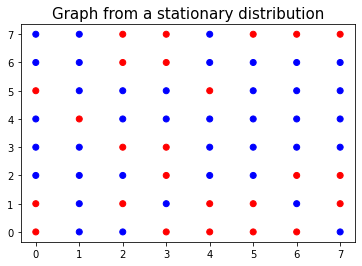

In [30]:
#plot 
size = 8
arr = np.random.choice([0, 1], size = size**2).reshape((size, size)).astype('bool')
plt.title('Graph from a stationary distribution', size = 15)
color(arr)

In [31]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
    
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        p = value(current, **kwargs)
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(int(np.sum(current)))
    return post[nburn:]

In [32]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

In [33]:
def proposal(current, i, **kwargs):
    _ = kwargs
    i = np.random.choice(8,2)
    
    s = 0
    if i[0] != 0:
        s += current[i[0] - 1][i[1]]
    if i[0] != 7:
        s += current[i[0] + 1][i[1]]
    if i[1] != 0:
        s += current[i[0]][i[1] - 1]
    if i[1] != 7:
        s += current[i[0]][i[1] + 1]
    
    if s == 0:
        current[i[0]][i[1]] = 1
    else:
        current[i[0]][i[1]] = 0
    return current

post = metroplis(np.zeros((8,8)), value, proposal, 100000)

In [34]:
num = sum(post) / len(post)
print('The averege number of painted vertices: ', num)

The averege number of painted vertices:  15.34209657903421


In [35]:
#Checking of stationarity
from scipy import stats
def g_test(x, start = 0.1, end = 0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var = False)

print(g_test(post[1000:]))
print(g_test(post[2000:]))
print(g_test(post[3000:]))
print(g_test(post[4000:]))
print(g_test(post[5000:]))

Ttest_indResult(statistic=-3.0956162363050383, pvalue=0.001966785722423742)
Ttest_indResult(statistic=1.3439013087639071, pvalue=0.17899588066603192)
Ttest_indResult(statistic=3.1056110446148812, pvalue=0.0019016113193156517)
Ttest_indResult(statistic=2.426777673614938, pvalue=0.015242781707492348)
Ttest_indResult(statistic=1.358371097838958, pvalue=0.17436218698696468)


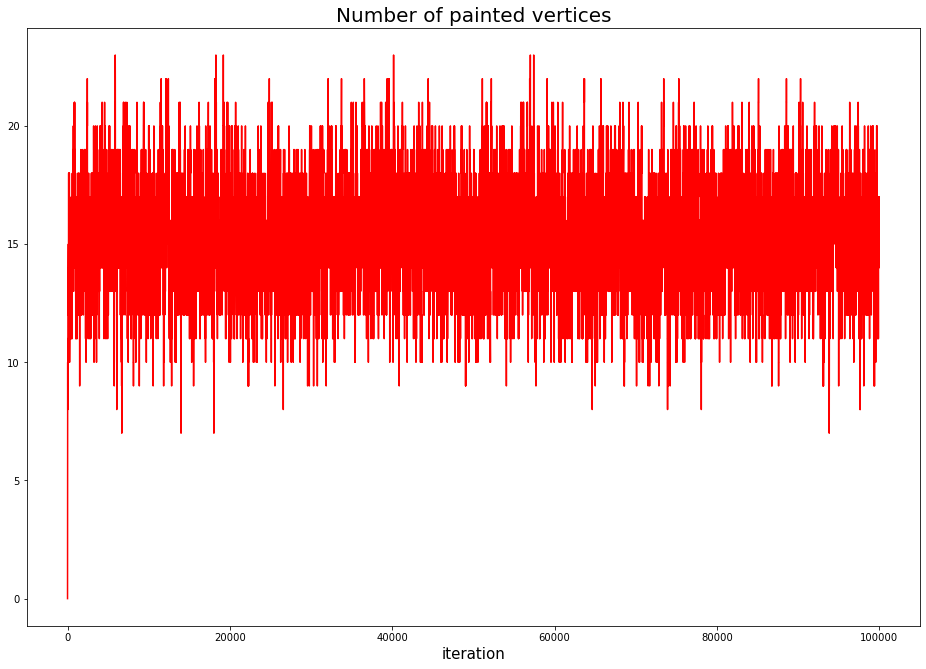

In [36]:
plt.figure(figsize = (16,11))
plt.plot(post, c = 'r')
plt.title('Number of painted vertices', size = 20)
plt.xlabel("iteration", size = 15)
plt.show()

In [38]:
#stationarity was confirmed

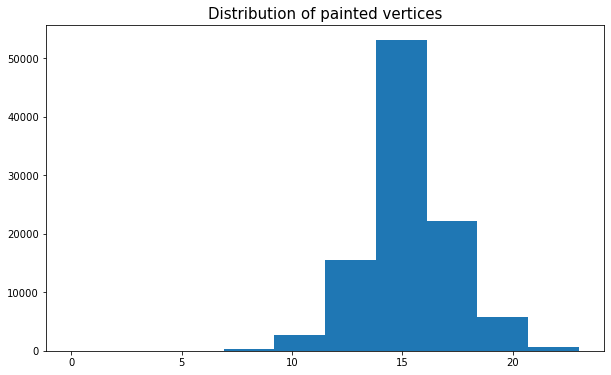

In [39]:
#Distribution  gistogram
plt.figure(figsize = (10,6))
plt.hist(post)
plt.title('Distribution of painted vertices', size = 15)
plt.show()